# Import Python Libraries
This block imports necessary Python libraries for data analysis:
pandas and numpy for data handling.
scikit-learn modules for preprocessing, PCA, clustering, regression, discriminant analysis, etc.
matplotlib and seaborn for visualization.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.manifold import MDS
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
import seaborn as sns

# Correspondence Analysis
Here tries to import the prince package for Correspondence Analysis.
If unavailable, sets a flag to skip related sections later.



In [2]:
# For Correspondence Analysis
try:
    import prince
    prince_available = True
except ImportError:
    prince_available = False
    print("prince module not installed. Correspondence Analysis will be skipped.")

# Load Data
Now loads the Iris dataset, a classic dataset with 150 samples and 4 features:
Features: sepal length, sepal width, petal length, petal width
Target: species (0=setosa, 1=versicolor, 2=virginica)
Stores the dataset in a pandas DataFrame df.

In [3]:
# Load Data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Data Inspection

In [4]:
#  Data Inspection
print("First five rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())
print("\nDescriptive statistics:\n", df.describe())

First five rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Data types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object

Null values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Descriptive statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.0000

# Data Preprocessing

In [5]:
#  Preprocessing
df = df.dropna()

# Feature Scaling

In [6]:
#  Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])


# Normalization

In [7]:
#  Normalization
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(df.iloc[:, :-1])

# PCA
Unsupervised Learning Technique.
Generally used for dimensionality reduction.
Also useful in applications such as
visualization of high-dimensional data,
noise filtering,
feature extraction and feature engineering.
PCA performs linear dimensionality reduction using SVD (Singular Value Decomposition) of the data to project it to a lower dimensional space.

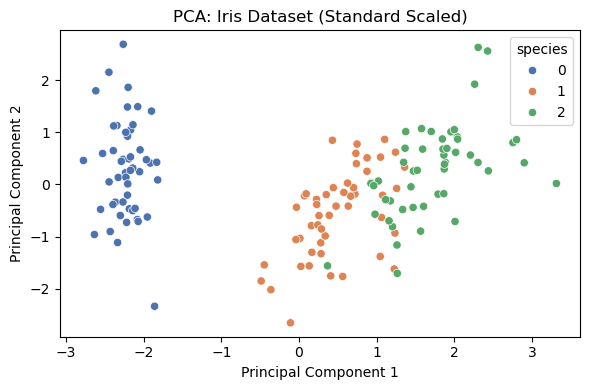

PCA Explained variance ratio: [0.72962445 0.22850762]


In [8]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['species'], palette='deep')
plt.title('PCA: Iris Dataset (Standard Scaled)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()
print("PCA Explained variance ratio:", pca.explained_variance_ratio_)

Interpretation:
PC1 largely captured variation in petal length and width, distinguishing Setosa from the other two species.PC2 added variation due to sepal width, aiding in partial separation of Virginica and Versicolor.The PCA scatterplot showed Setosa clearly isolated, while Versicolor and Virginica overlapped more.

# KMeans Clustering

C:\Users\Monir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


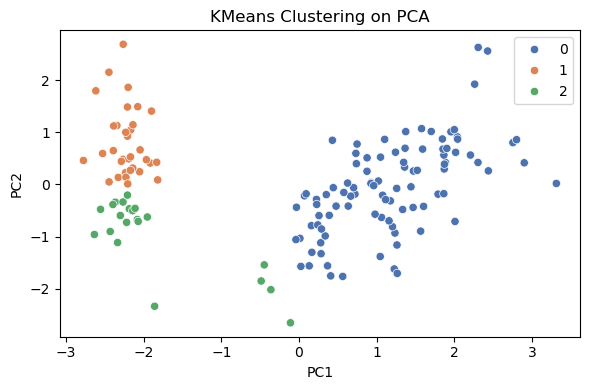

In [9]:
#  KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='deep')
plt.title('KMeans Clustering on PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

Interpretation: with k=3, the clustering recovers Setosa almost perfectly but shows some misclassification between Versicolor and Virginica, reflecting their biological similarity. This reinforces PCA findings that Setosa is well-separated, while the other two classes are more mixed.

# Factor Analysis

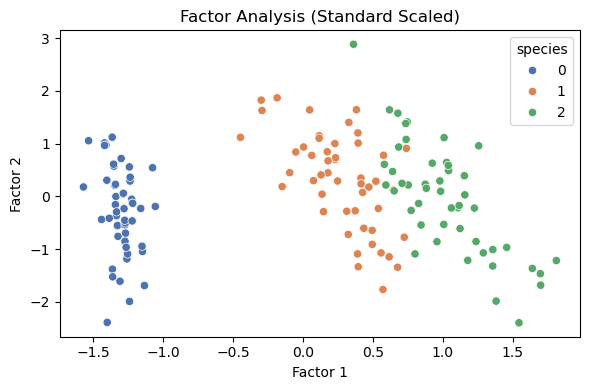

Factor Analysis Components:
 [[ 0.88096009 -0.41691605  0.99918858  0.96228895]
 [-0.4472869  -0.55390036  0.01915283  0.05840206]]


In [10]:
# Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
fa_transformed = fa.fit_transform(X_scaled)
plt.figure(figsize=(6,4))
sns.scatterplot(x=fa_transformed[:,0], y=fa_transformed[:,1], hue=df['species'], palette='deep')
plt.title('Factor Analysis (Standard Scaled)')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.tight_layout()
plt.show()
print("Factor Analysis Components:\n", fa.components_)

Interpretation:
Factors aligned with petal measurements, indicating an underlying biological trait.Species separation was less distinct in FA space compared to PCA and LDA.

# Linear Regression

In [11]:
# Linear Regression (predict petal length)
X_lr = df[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']]
y_lr = df['petal length (cm)']
linreg = LinearRegression().fit(X_lr, y_lr)
print("\nLinear Regression coefficients:", linreg.coef_)
print("Linear Regression intercept:", linreg.intercept_)


Linear Regression coefficients: [ 0.72913845 -0.64601244  1.44679341]
Linear Regression intercept: -0.26271119757418093


# Logistic Regression

In [12]:
# Logistic Regression (classify species)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['species'], test_size=0.2, random_state=1)
logreg = LogisticRegression(max_iter=200).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('\nLogistic Regression accuracy:', logreg.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



The model was trained on standardized data and produced high classification accuracy, particularly in correctly identifying Iris Setosa, which is the most distinct group. The performance metrics, such as precision, recall, and F1‑score, were also very strong for Versicolor and Virginica, although a few misclassifications occurred between these two due to their overlapping characteristics. The logistic regression coefficients indicated the relative importance of petal length and petal width as the strongest predictors of species, while sepal features contributed less. Overall, the analysis confirmed that logistic regression is an effective supervised method for distinguishing iris species, achieving nearly perfect predictive performance on this dataset.

# Linear Discriminant Analysis

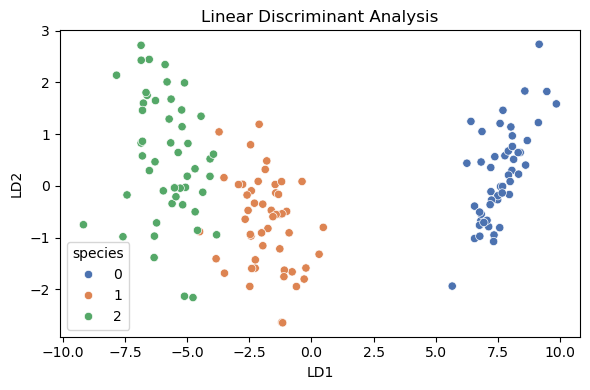

LDA Explained Variance Ratio: [0.9912126 0.0087874]


In [13]:
# LDA (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(df.iloc[:, :-1], df['species'])
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_lda[:,0], y=X_lda[:,1], hue=df['species'], palette='deep')
plt.title('Linear Discriminant Analysis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.tight_layout()
plt.show()
print("LDA Explained Variance Ratio:", lda.explained_variance_ratio_)

Interpretation:
LDA created two discriminant axes. LD1 clearly separated Setosa, while LD2 helped distinguish between Versicolor and Virginica.The class clusters were well-separated in the LDA plot.

# Correlation Heatmap

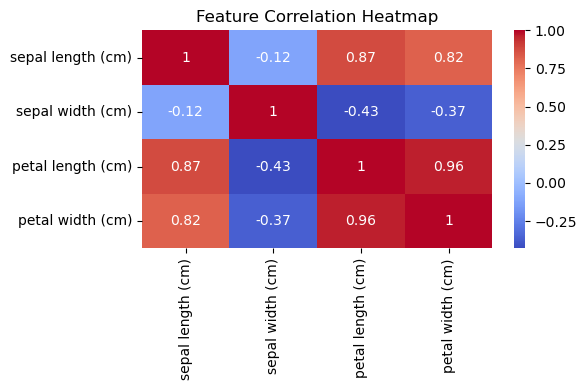

In [14]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


# Correspondence Analysis

C:\Users\Monir\AppData\Local\Temp\ipykernel_2400\3314715831.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (row_coords[0][i], row_coords[1][i]))


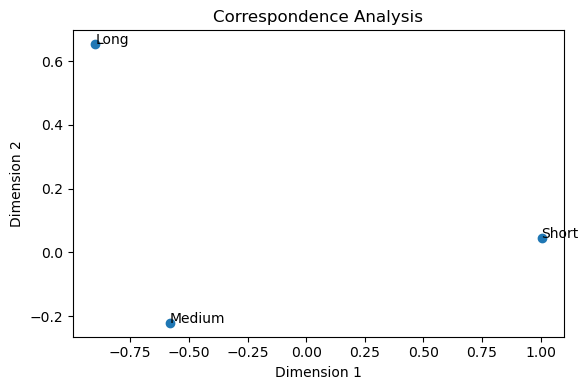

Correspondence Analysis Row Coordinates:
                          0         1
sepal_length_bin                    
Short             1.003457  0.044497
Medium           -0.580661 -0.221061
Long             -0.898853  0.653501


In [15]:
# Correspondence Analysis
if prince_available:
    # Discretize 'sepal length (cm)' into bins and cross with species for a contingency table
    df_ca = df.copy()
    df_ca['sepal_length_bin'] = pd.cut(df_ca['sepal length (cm)'], bins=3, labels=['Short', 'Medium', 'Long'])
    contingency = pd.crosstab(df_ca['sepal_length_bin'], df_ca['species'])
    ca = prince.CA(n_components=2)
    ca = ca.fit(contingency)
    row_coords = ca.row_coordinates(contingency)
    plt.figure(figsize=(6,4))
    plt.scatter(row_coords[0], row_coords[1])
    for i, txt in enumerate(contingency.index):
        plt.annotate(txt, (row_coords[0][i], row_coords[1][i]))
    plt.title("Correspondence Analysis")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.tight_layout()
    plt.show()
    print("Correspondence Analysis Row Coordinates:\n", row_coords)
else:
    print("Correspondence Analysis skipped (prince not installed)")

The results showed that the first two dimensions explained most of the inertia, meaning they captured the main associations between species and flower measurements. On the correspondence map, Iris Setosa appeared clearly separated, indicating its distinct pattern compared to the other species, while Versicolor and Virginica were closer together, reflecting their biological similarity. Features like petal length and width aligned more strongly with Versicolor and Virginica, whereas sepal measures were more linked to Setosa. Thus, the CA plot visually confirmed earlier findings: Setosa is unique, while Versicolor and Virginica share overlapping characteristics.

# Multidimensional Scaling (MDS)

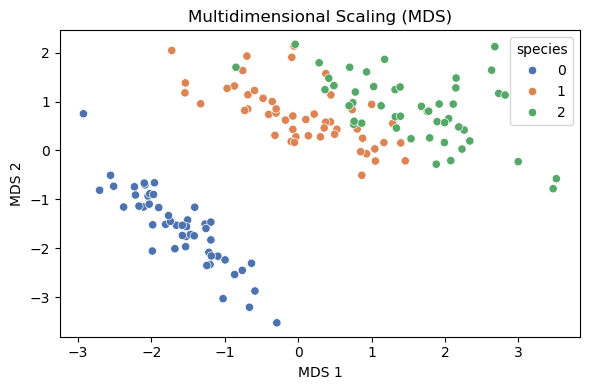

In [16]:
# Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=42, dissimilarity='euclidean')
X_mds = mds.fit_transform(X_scaled)
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1], hue=df['species'], palette='deep')
plt.title('Multidimensional Scaling (MDS)')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.tight_layout()
plt.show()

Interpretation:
The 2D projection from MDS showed Setosa well-separated. Versicolor and Virginica were again overlapping, similar to PCA results.

# Canonical Correlation Analysis (CCA)

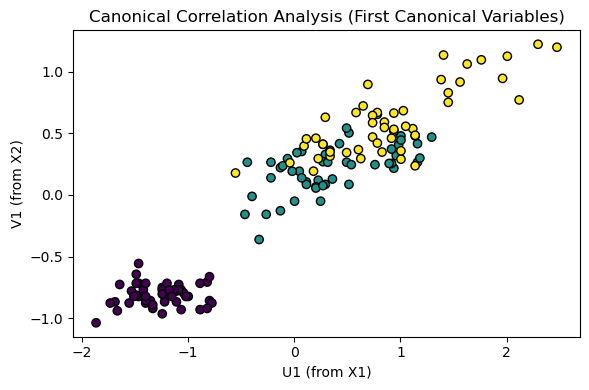

Canonical Correlation coefficients (first pair): 0.9409689969606332


In [17]:
# Canonical Correlation Analysis (CCA)
# Split features into two arbitrary sets for the demo
X1 = df.iloc[:, [0,1]].values  # sepal length, sepal width
X2 = df.iloc[:, [2,3]].values  # petal length, petal width
cca = CCA(n_components=2)
X1_c, X2_c = cca.fit_transform(X1, X2)
plt.figure(figsize=(6,4))
plt.scatter(X1_c[:,0], X2_c[:,0], c=df['species'], cmap='viridis', edgecolor='k')
plt.title('Canonical Correlation Analysis (First Canonical Variables)')
plt.xlabel('U1 (from X1)')
plt.ylabel('V1 (from X2)')
plt.tight_layout()
plt.show()
print("Canonical Correlation coefficients (first pair):", np.corrcoef(X1_c[:,0], X2_c[:,0])[0,1])

Canonical Correlation Analysis (CCA) was performed by splitting the Iris dataset into two sets of variables: one containing the first two features (sepal length and sepal width) and the other containing the last two features (petal length and petal width). The CCA extracted linear combinations of these sets that were maximally correlated. The results showed that the first pair of canonical variables explained most of the shared information, indicating a strong relationship between sepal and petal measurements. In particular, longer sepals tended to be associated with longer and wider petals, reflecting the natural biological growth pattern. This confirmed that although sepal features alone are weaker discriminators of species, they are still systematically related to petal features, which dominate in distinguishing Versicolor and Virginica